### <div style="background-color: #BAE3BC; padding: 10px;"><b>Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston</b>

</div>

**Exercici 1**.

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import metrics
import seaborn as sns
%matplotlib inline

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Importem el dataset</b>

</div>

*Com que el dataset no té una fila de capçaleres, doncs deixarem que la llibreria Pandas asigni noms a les columnes de manera predeterminada*

In [2]:
house = pd.read_csv('housing data.csv',header=None)
house.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

*Ara revisem ràpidament el dataset*

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


*Veiem que tenim 14 columnes i 506 files. Totes les columnes són numèriques i porten un tipus de dade Float o int.* 

*Ara necessitem entendre aquest dataset i per això tenim un recurs extra amb els noms de les columnes. A continuació obrirem aquest nou arxiu i mirarem l'informació que té.*

In [4]:
with open('housing data description.txt', encoding='utf8') as h:
    for line in h:
        print(line.strip())

1. Title: Boston Housing Data

2. Sources:
(a) Origin:  This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.
(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
(c) Date: July 7, 1993

3. Past Usage:
-   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
1980.   N.B. Various transformations are used in the table on
pages 244-261.
-  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4. Relevant Information:

Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN 

*L'arxiu anterior és fonamental per desenvolupar l'actual exercici. Fent un resumen, el dataset que hem anomenat 'House' és una mostra del valor de l'habitage als suburbis de Boston. Aquest dataset té atributs qué parlen sobre les característiques de l'habitatge i per tant influeixen en el seu preu. El preu esta representat en el dataset per la variable 'MEDV', doncs aquesta seria la nostra variable a predir o target. Totes les altres variables que no siguin el target són atributs de l'habitatge mateix o relatius al barri i, en conseqüència influeixen en el preu final de l'habitatge.*

*Ara que ja tenim el nom de les columnes i sabem que volen dir, canviarem els noms predeterminats de les columnes per les correctes*

In [5]:
house.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
house.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

*Ara repasem el dataset novament.*

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
house.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Veiem com la columne 'CHAS' només té dos valors unics. Això és perquè correspon a una variable dummy (binària). Llavors, es posa un "1" si el terreny on es localitza l'habitatge limita amb el riu i "0" si passa el contrari.

*Mirarem si hi ha Nan's, nulls o duplicats*.

In [9]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
house.duplicated().sum()

0

*Ara que ja hem comprovat que no existeixen nulls, nan's ni duplicats, doncs mirarem la correlació de totes les variables amb una gràfica de Heatmap.*

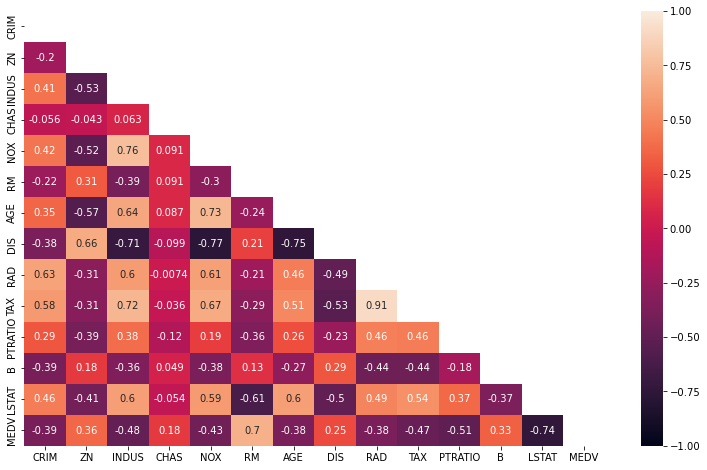

In [12]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(house.corr()))

sns.heatmap(house.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.show()

1. El heatmap ens indica que la nostra variable target "MEDV" té una alta correlació positiva amb "RM" i negativa amb "LSTAT". Això fa molt sentit perquè per una banda mentre més habitacions tingui un habitatge major serà el preu i, d'un altre banda mentre el porcentatge de població de baixos ingressos sigui més baix, doncs el valor de l'habitatge serà més alt. Això perquè normalment en las zones més riques els habitatges tenen preus més alts. 

2. Una de les correlacions més altes del conjunt de dades es dona entre "DIS" i "NOX". És una alta correlació negativa que s'explica perquè mentre més lluny de les zones d'alta densitat de treball, comportaria menys densitat de trànsit, població flotant, industries, etc. D'aquesta manera quant més lluny d'aquest llocs, el nivell de contaminació serà més baix.

*En general sense entrar en detalls, podem veure correlacions tant positives com negatives amb un grup important de variables que correlacionen al voltant d'un R entre 0.3 i 0.5*.

Ara mirarem ràpidament com són los formas de distribució de totes les combinacions posibles del dataset. A través d'un PairGrid indicarme diferents tipus de gràfiques per tenir una millor comprensió de les dades amb una fàcil lectura de les mateixes.

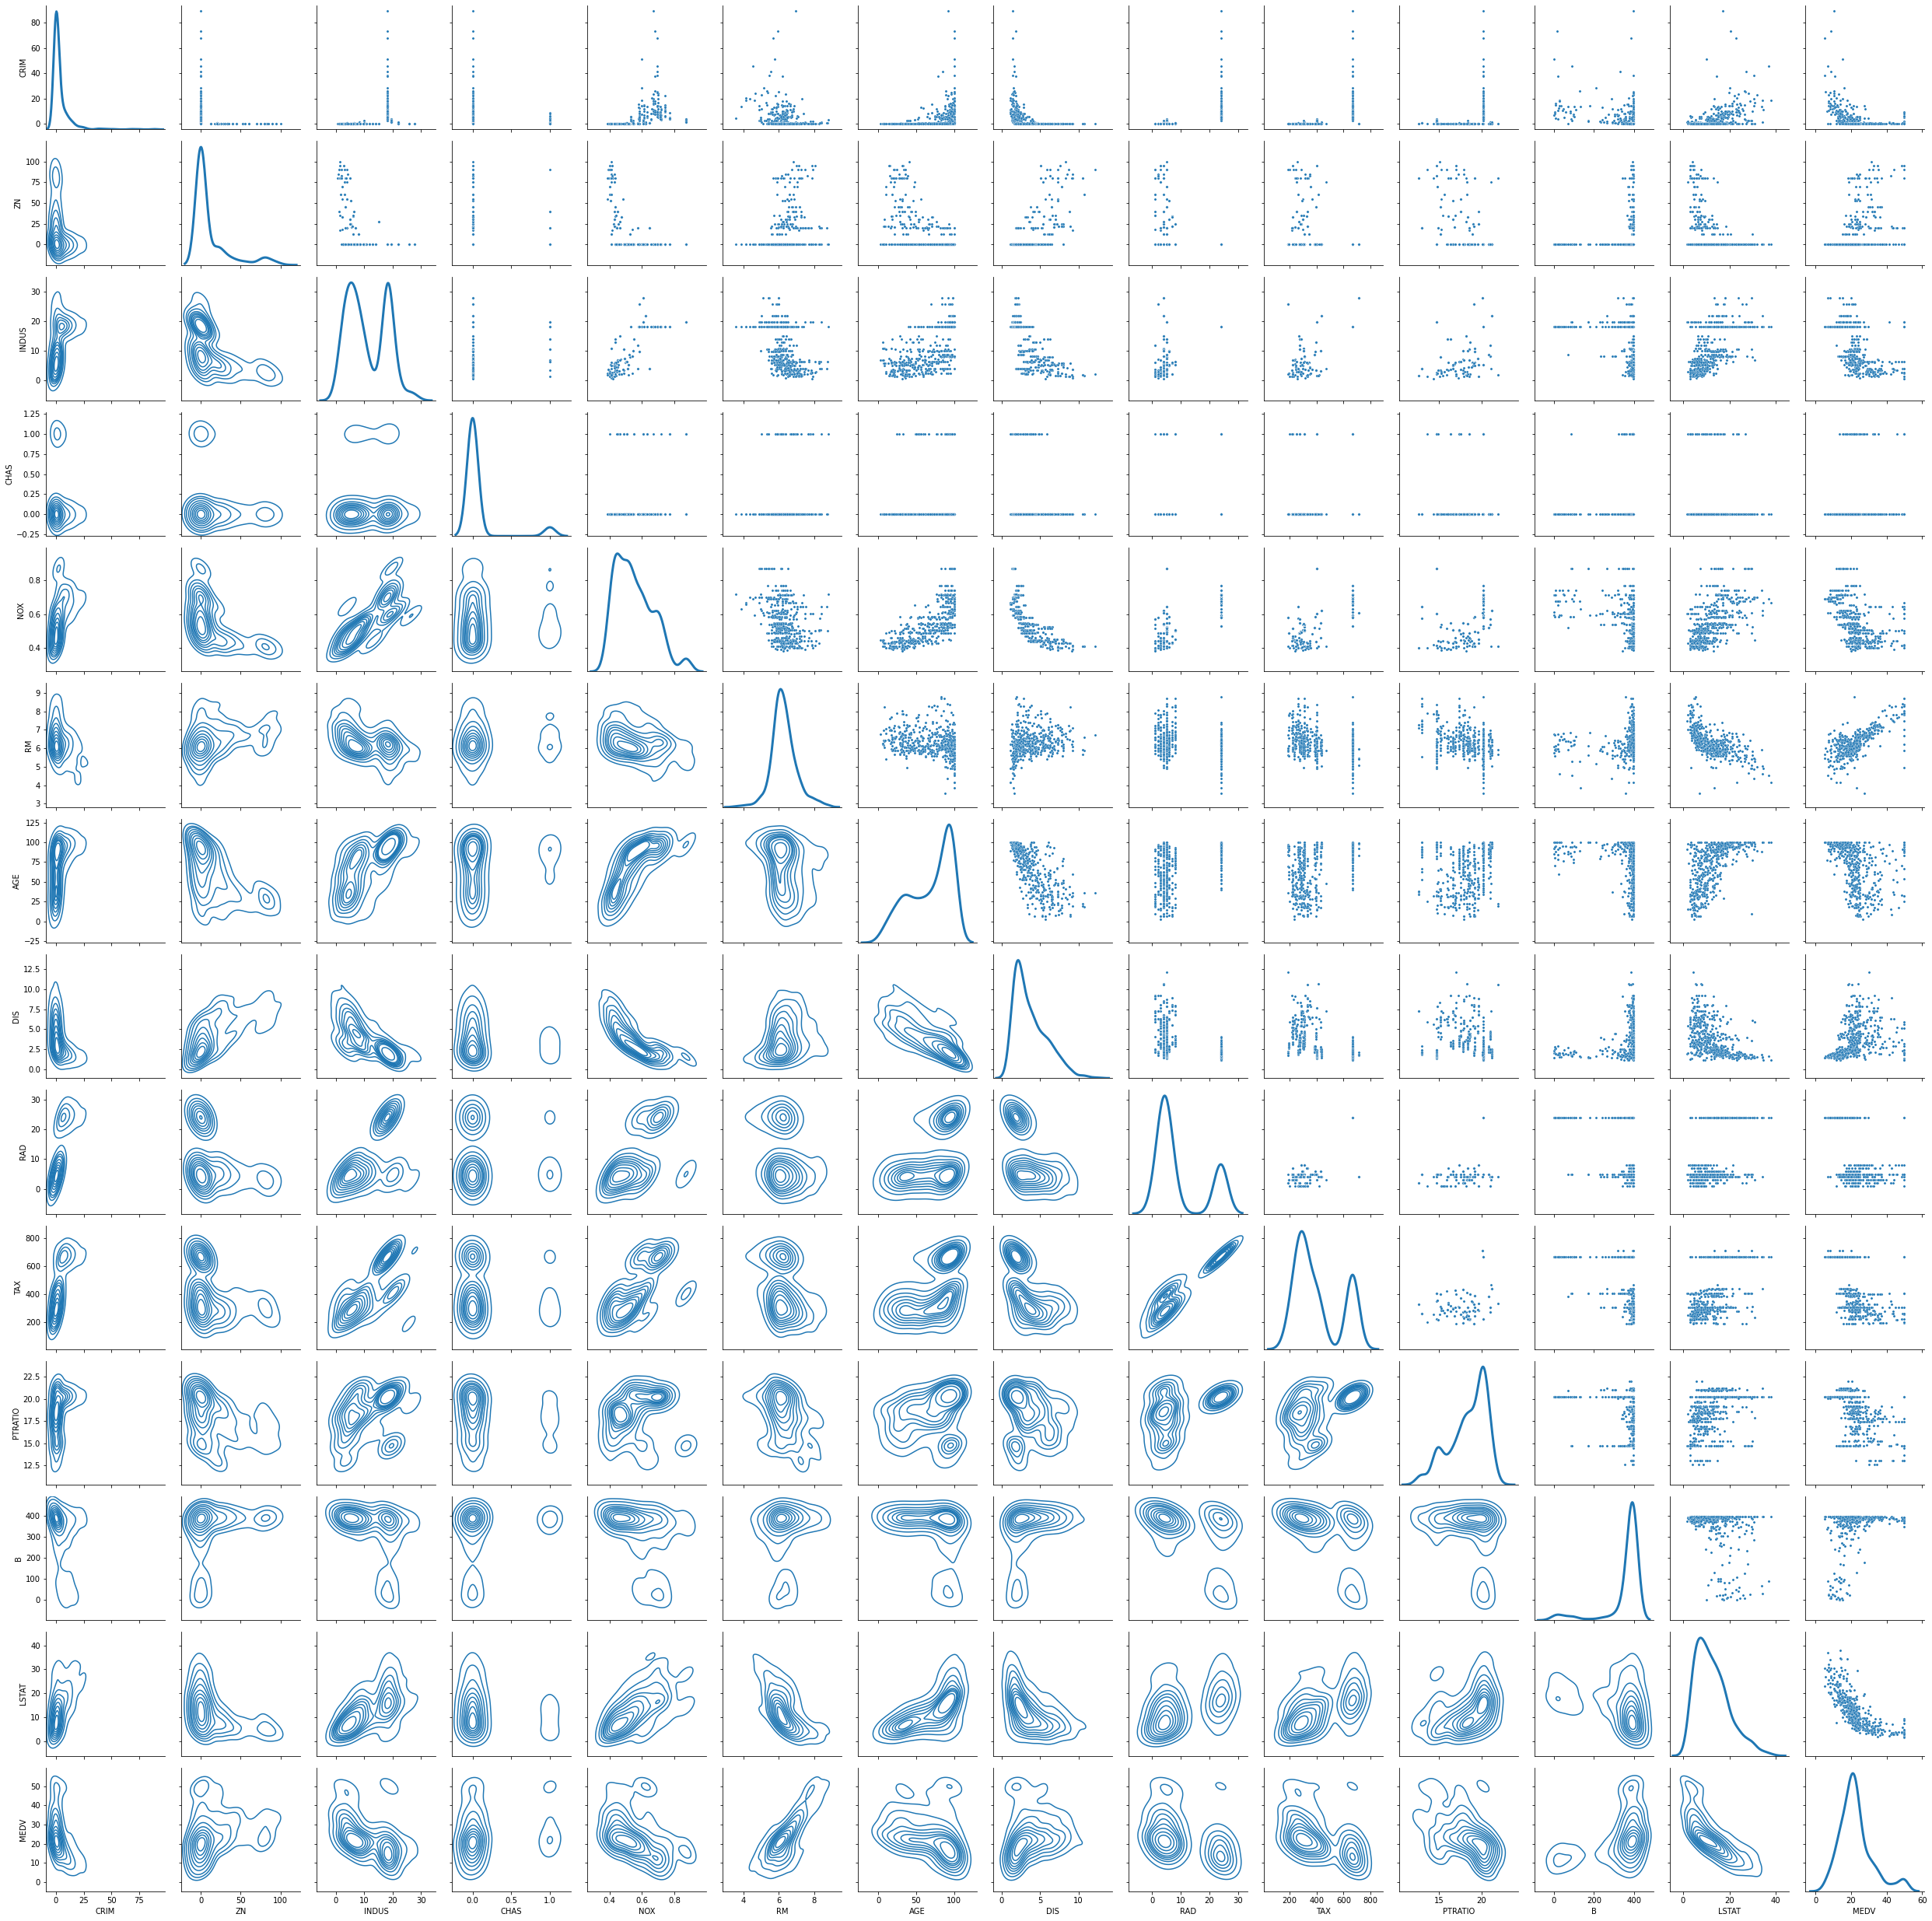

In [13]:
h = sns.PairGrid(house, diag_sharey=False)
h.map_upper(sns.scatterplot, s=10)
h.map_lower(sns.kdeplot)
h.map_diag(sns.kdeplot, lw=3)


plt.show()

*De les gràfiques anteriors podem extreure que cap atribut presenta una distribució normal, excepte "RM" (tot aixó dit visualment). Anem a comprovar-ho*.

1. hipòtesi nul·la      (h0) : l'atribut 'RM' té una distribució normal (Gaussiana)
2. Hipòtesi alternativa (h1) : l'atribut 'RM' no té una distribució normal (Gaussiana)

In [14]:
from scipy.stats import shapiro

info = house['RM']
stat, p = shapiro(info)
print ('stat=%.3f, p=%.10f' % (stat, p))
if p > 0.05:
    print("L'atrib 'RM' té una distribució Probablement Gaussiana i, per tant no podem rebutjar l'hipòtesi nul·la")
    
else:
    print("L'atribut 'RM' no té probablement una distribució Gaussiana i, per tant podem rebutjar l'hipòtesi nul·la")

stat=0.961, p=0.0000000002
L'atribut 'RM' no té probablement una distribució Gaussiana i, per tant podem rebutjar l'hipòtesi nul·la


*Veiem que l'única variable qué ens pensavem (de manera visual) podia tenir una distribució normal, no en té*.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Separant el conjunt de dades en Train i Test</b>

</div>

#### Separarem el conjunt de dades en dos fent servir una distribució del 80% para entrenar les dades i el 20% restant per testejar-ho. Abans de fer això, treurem la variable "target" que ja hem definit previament. Doncs, ens quedarem per una banda ,amb un nou dataframe amb les variables independents, és a dir, sense 'MEDV' (valors dels habitatges) qué és la variable que volem predir. I d'un altre banda ens quedarem amb un dataframe que només tindrà la variable a predir. Aixó ho farem servir al moment d'aplicar el Train test Split.

In [15]:
X=house.drop(['MEDV'], axis=1)
X.shape

(506, 13)

In [16]:
y=house[['MEDV']]
y.shape

(506, 1)

*El que hem fet ens corrobora que ara tenim dos nous dataframes amb la mateixa quantit de registres, però amb diferentes quantitats de columnes o variables. Un en té 13 i l'altre només 1 (el target). Ara Farem la redistribució de registres pel Train/test. Com hem dit abans, el 80% de les dades aniràn pel house_train i el 20% de les dades pel house_test*

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


*De les dades anteriors podem veure com queden els quatre subgrups. El dataset sencer menys el 20% de les dades deixa subgrups amb 404 registres (d'entrenament), mentre que el 20% de les dades representa 102 registres (de prova).*


### <div style="background-color: #D3DDF7; padding: 10px;"><b>Analitzant els subgrups Train i Test</b>

</div>

*Mirarem primer de tot un anàlisi general estadístic descriptiu i desprès un anàlisi visual per veure com són les distribucions de les dades i si trobem (el més problable és que no) alguna distribució gaussiana a primer vista*.

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 192 to 122
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 11.2 KB


*Ja havíem vist abans qué els registres baixaven tant en el train com en el test. Però, hem volgut revisar que totes les altres característiques segueixin igualment*. 

Ara mirem l'estadística descriptiva del Train.

In [20]:
X_train.describe().T

count        mean         std        min         25%        50%  \
CRIM     404.0    3.714276    8.497258    0.00632    0.079980    0.26266   
ZN       404.0   10.996287   22.941789    0.00000    0.000000    0.00000   
INDUS    404.0   11.085347    6.870004    0.74000    5.130000    9.69000   
CHAS     404.0    0.061881    0.241238    0.00000    0.000000    0.00000   
NOX      404.0    0.557086    0.117656    0.38500    0.449000    0.53800   
RM       404.0    6.272166    0.712302    3.56100    5.886500    6.20850   
AGE      404.0   68.894307   28.096077    2.90000   45.675000   77.50000   
DIS      404.0    3.787746    2.135045    1.12960    2.087875    3.14230   
RAD      404.0    9.784653    8.818302    1.00000    4.000000    5.00000   
TAX      404.0  413.091584  170.053776  187.00000  281.000000  334.50000   
PTRATIO  404.0   18.473515    2.171029   12.60000   17.375000   19.10000   
B        404.0  357.850767   89.476355    0.32000  375.085000  391.26000   
LSTAT    404.0   12.788218    7.225008    1.73000    7.170000   11.39500   

                75%       max  
CRIM       3.896877   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.647000    0.8710  
RM         6.607000    8.7800  
AGE       93.925000  100.0000  
DIS        5.141475   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.157500  396.9000  
LSTAT     17.105000   37.9700

In [21]:
X_test.describe().T

count        mean         std        min         25%        50%  \
CRIM     102.0    3.214466    9.035087    0.01301    0.090897    0.23536   
ZN       102.0   12.818627   24.837770    0.00000    0.000000    0.00000   
INDUS    102.0   11.340490    6.851950    0.46000    6.200000    9.90000   
CHAS     102.0    0.098039    0.298836    0.00000    0.000000    0.00000   
NOX      102.0    0.545226    0.108582    0.39200    0.449250    0.52400   
RM       102.0    6.334020    0.663926    4.90300    5.881250    6.22600   
AGE      102.0   67.309804   28.460939    6.60000   42.350000   77.25000   
DIS      102.0    3.823943    1.995116    1.33250    2.203050    3.39480   
RAD      102.0    8.617647    8.228235    1.00000    4.000000    5.00000   
TAX      102.0  389.009804  161.769454  188.00000  277.000000  307.00000   
PTRATIO  102.0   18.384314    2.149821   13.00000   17.400000   18.60000   
B        102.0  352.013235   98.496089    6.68000  375.667500  392.76000   
LSTAT    102.0   12.117745    6.806263    2.47000    6.345000   11.28500   

                75%       max  
CRIM       1.965348   73.5341  
ZN        16.250000   95.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.605000    0.8710  
RM         6.716000    8.3370  
AGE       94.400000  100.0000  
DIS        5.202825    9.2229  
RAD        8.000000   24.0000  
TAX      437.000000  711.0000  
PTRATIO   20.200000   21.2000  
B        396.237500  396.9000  
LSTAT     16.007500   29.9700

1. Si observem les dades dels subgrups podem veure coses intuitives com que la mitja baixi o pugi poc entre Train i Test.

2. La Desviació stàndar es manté força similar en la majoria dels casos, mentre que per exemple en 'B' canvia una mica més del esperable.

3. Amb els valors minims passa el mateix que en el punt 2. La variable 'B' és la que presenta les majors diferències.

4. La mitjana pràcticament no canvia, excepte en 'TAX'

5. Finalment, podem dir que no hi ha un canvi significatiu mirant aquesta descripció estadística bàsica.

*Ara per finalitzar mirarem de forma visual com són les distribucions de les dades dels nostres nous grups Train i Test*. 

Comencem pel Train.

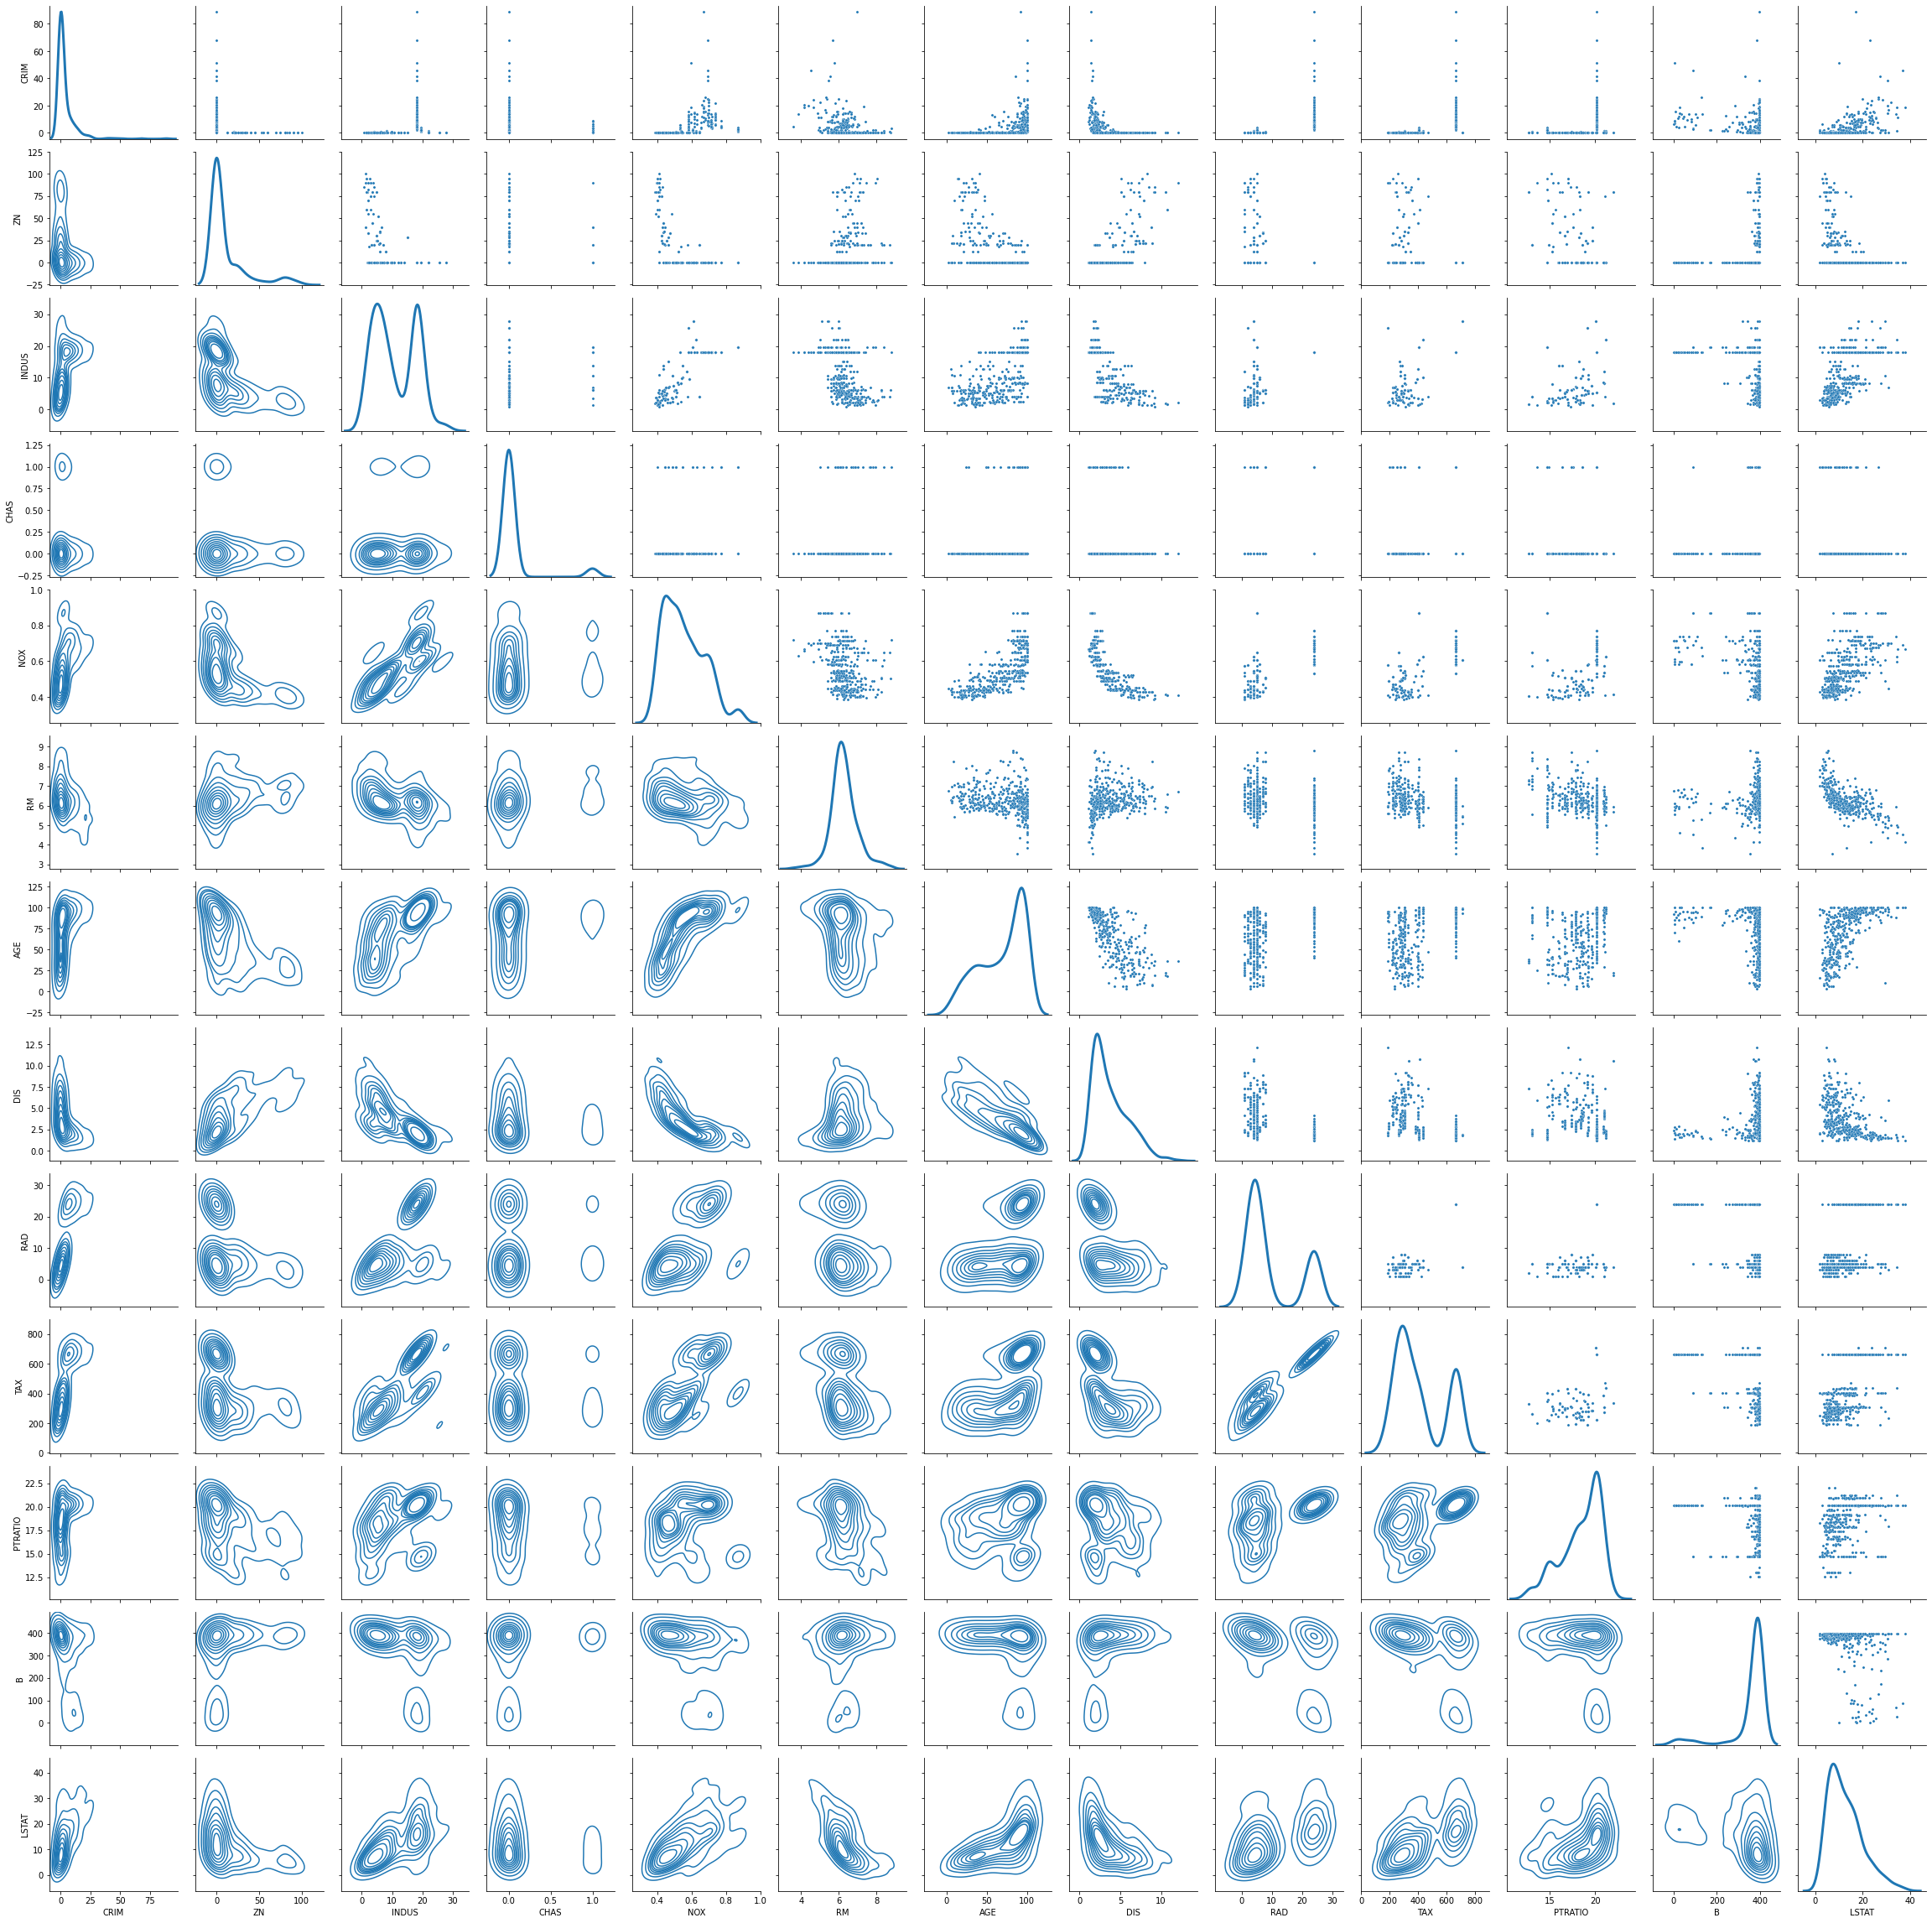

In [22]:
h = sns.PairGrid(X_train, diag_sharey=False)
h.map_upper(sns.scatterplot, s=10)
h.map_lower(sns.kdeplot)
h.map_diag(sns.kdeplot, lw=3)


plt.show()

Ara fem el mateix amb el Test.

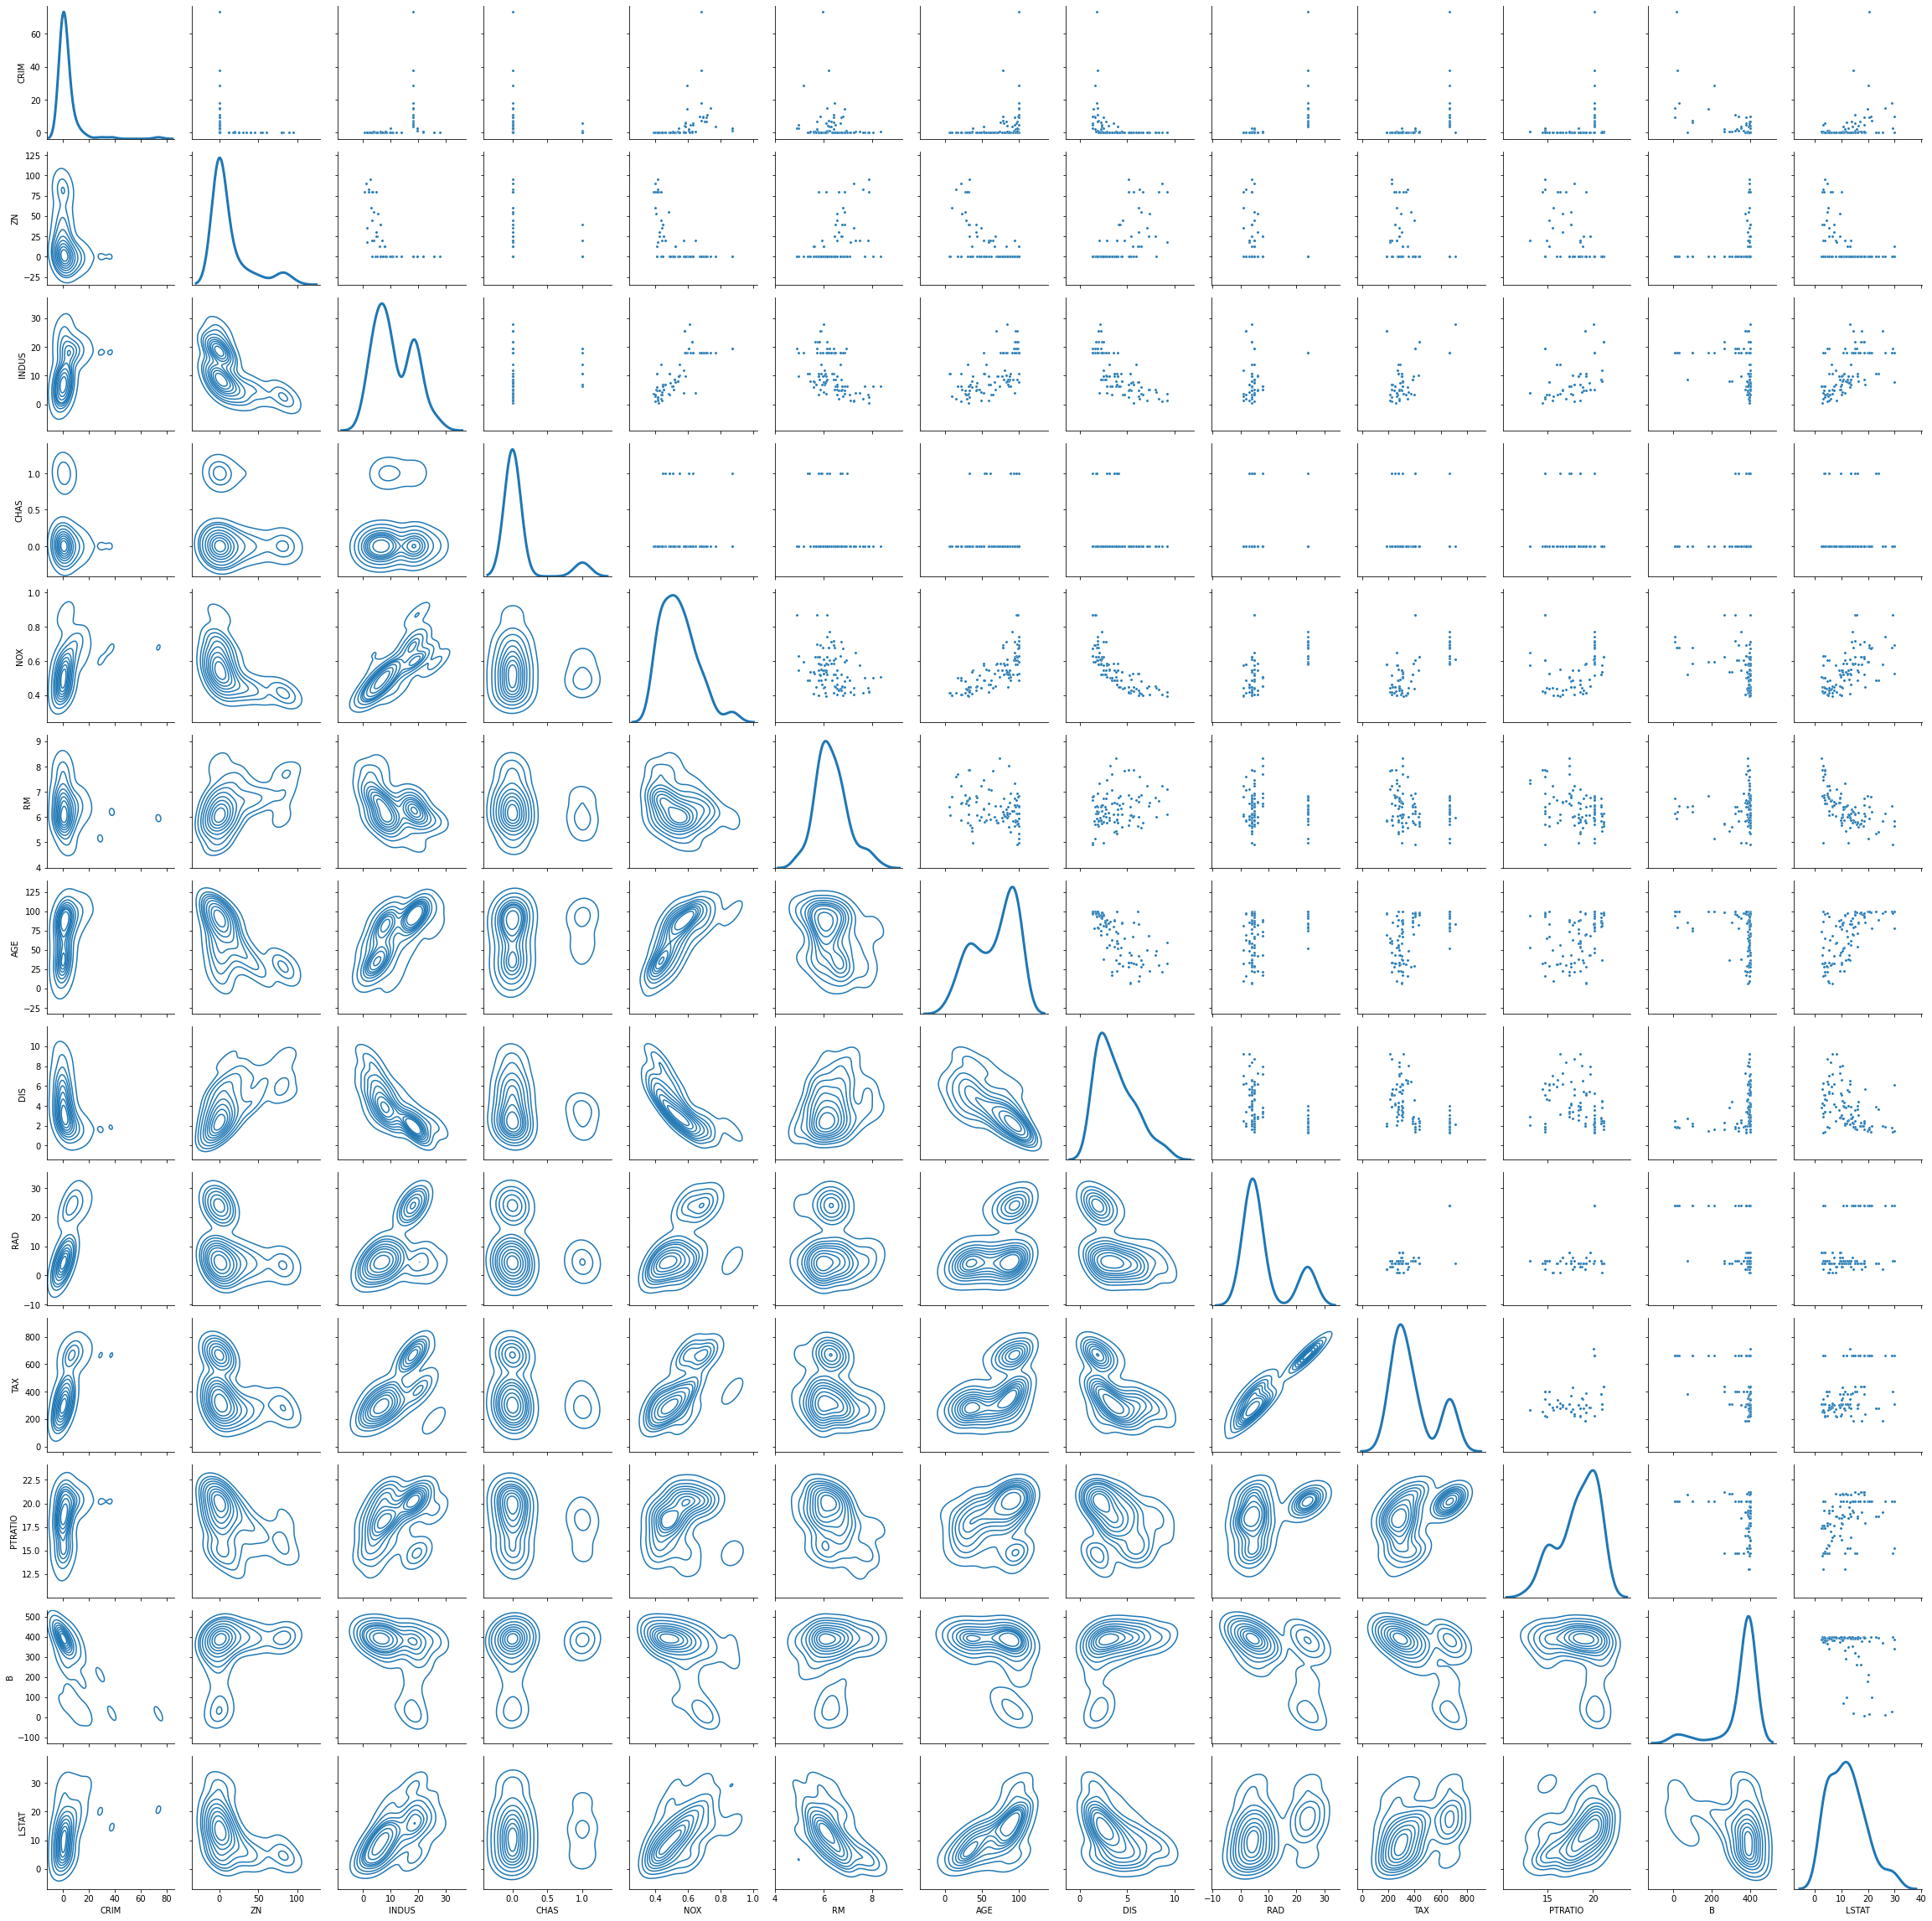

In [23]:
h = sns.PairGrid(X_test, diag_sharey=False)
h.map_upper(sns.scatterplot, s=10)
h.map_lower(sns.kdeplot)
h.map_diag(sns.kdeplot, lw=3)


plt.show()

1. Novament i com era d'esperar no veiem distribucions gausianes, excepte 'RM', la qual ja haviem comprovat que no era amb el test de Shapiro.

2. Les distribucions del Train i del test són força similars i hauriem de fer tests estadístics per comprovar-ho més endavant.

### **Exercici 2**.

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

*Abans d'aplicar algún procés de transformació a les nostres dades hem d'entre perqué ho fem. A continuació algunes idees fonamentals:*

1. Si hem d'aplicar models de machine learning en un pas posterior, hem d'assegura-nos que aquests models puguin comparar i combinar les variables sota una escala comú.

2. Alguns models de machine learning assumeixen que les dades ja es troben estandaritzades.

3. Hem d'asegurar-nos que cap variable pugi tenir una dominància per sobre les altres. Si existeix una variable amb una escala molt més gran que altres podría tenir un impacte desproporcionat en el model.

Dit això i primer de tot, el que farem serà corroborar que totes les variables tinguin una distribució normal. Perquè dependent d'això, farem diferents tipus de transformacions. Per tant, aquest pas és bàsic abans de fer alguna altre cosa. Farem servir un bucle per fer-ho ràpidament i numèricament (podriem mirar-ho només visualment però això no ens assegura res). Aplicarem el test de Shapiro que ja coneixem:

Comprovarem per a cada variable del Train el següent:
    
    1. Hipòtesi nul·la      (H0): Aquesta variable té probablement una distribució normal de tipus Gaussiana."
    2. Hipòtesi alternativa (H1): Aquesta variable no té probablement una distribució normal de tipus Gaussiana."

In [35]:
from scipy import stats
from scipy.stats import shapiro

for data in X_train.columns:
    shapiro_test = stats.shapiro(X_train[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La mostra té probablement una distribució normal i, per tant s'acull l'hipòtesi nul·la.\n")
    else:
        print("La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.\n")

La variable CRIM te un P-value de 6.829980704054491e-33
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable ZN te un P-value de 6.414637407606698e-31
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable INDUS te un P-value de 2.4327082706675045e-16
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable CHAS te un P-value de 3.3795745087911174e-37
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable NOX te un P-value de 2.7459835620635697e-12
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable RM te un P-value de 1.4480237009451002e-09
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable AGE te un P-value de 1.9231312643658473e-16
La mostra no té probablement una distr

*Ara mirarem si en aquest conjunt de dades existeixen outliers*

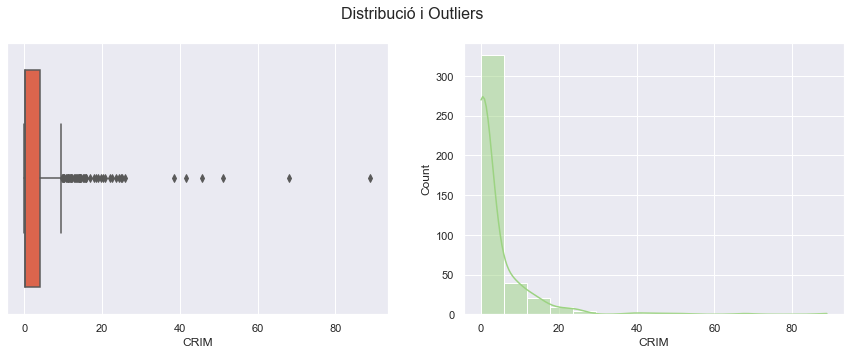

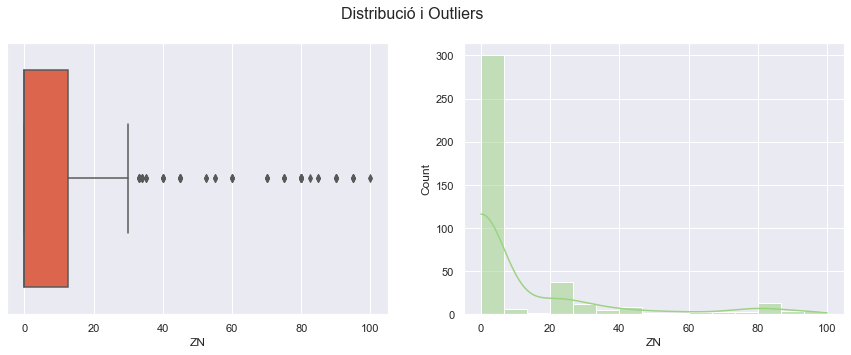

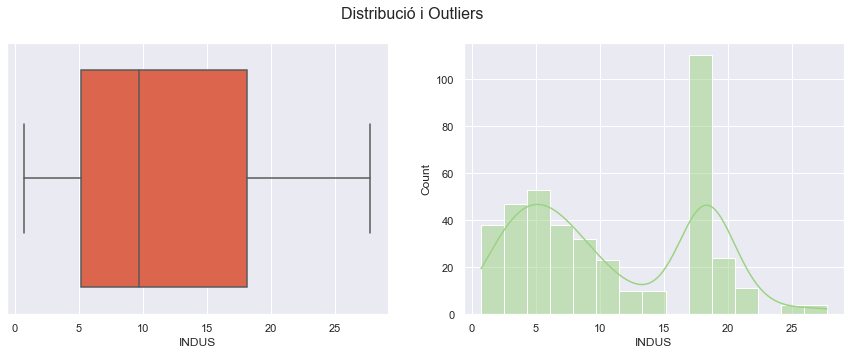

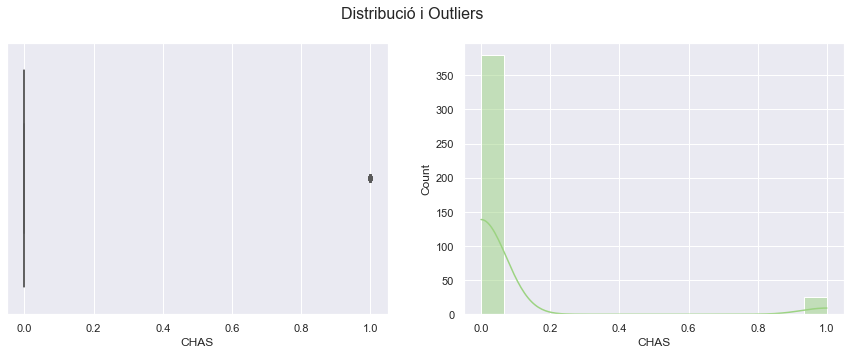

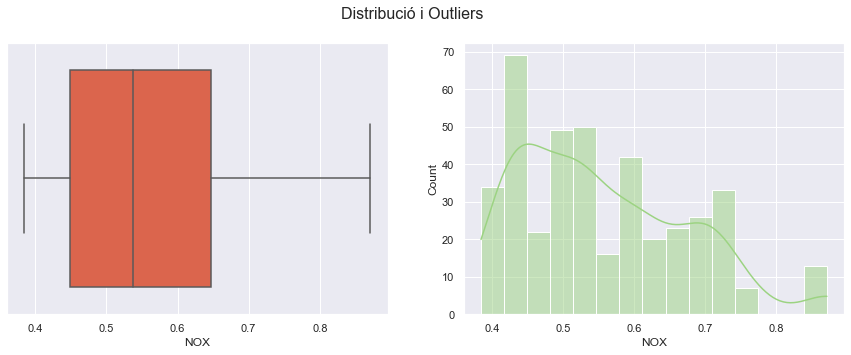

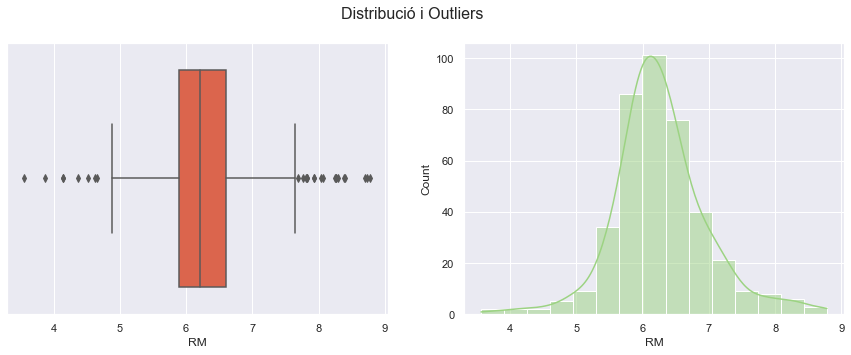

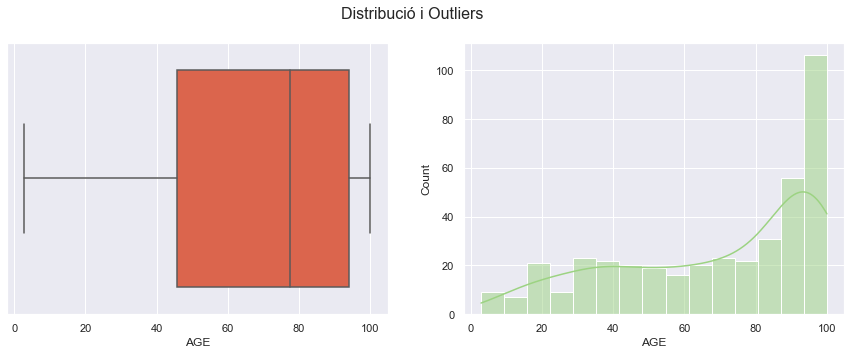

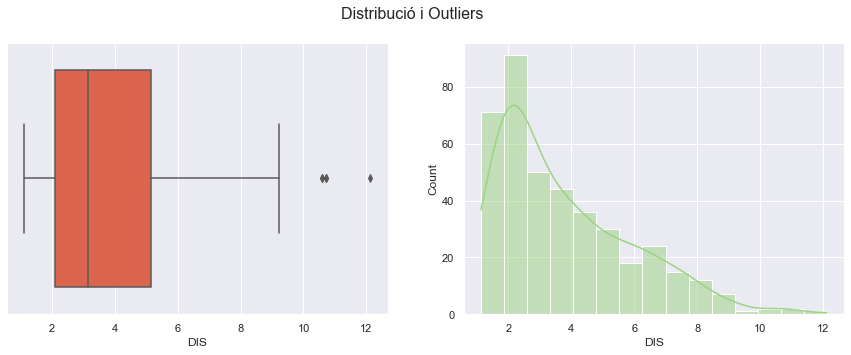

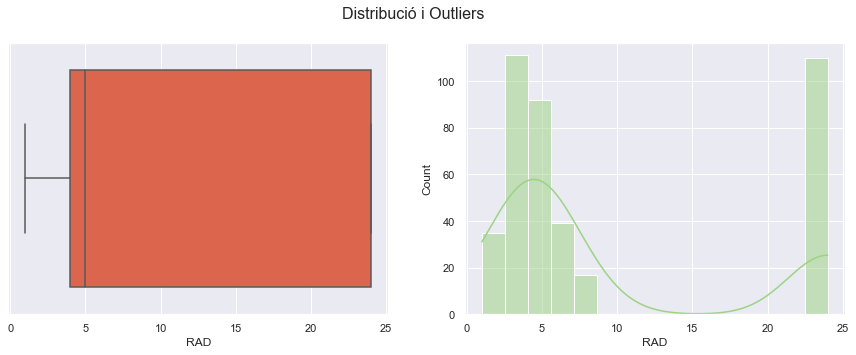

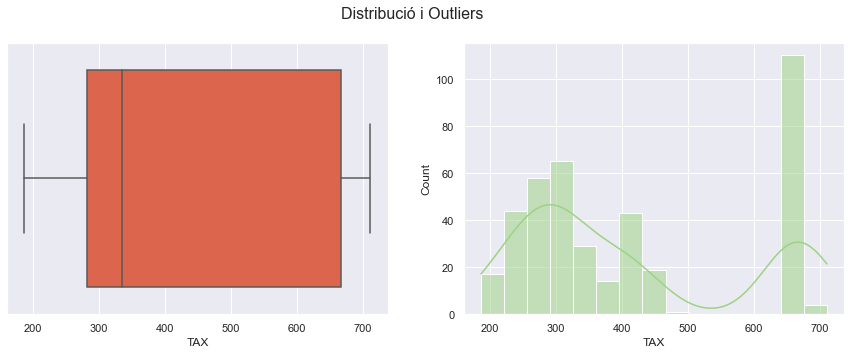

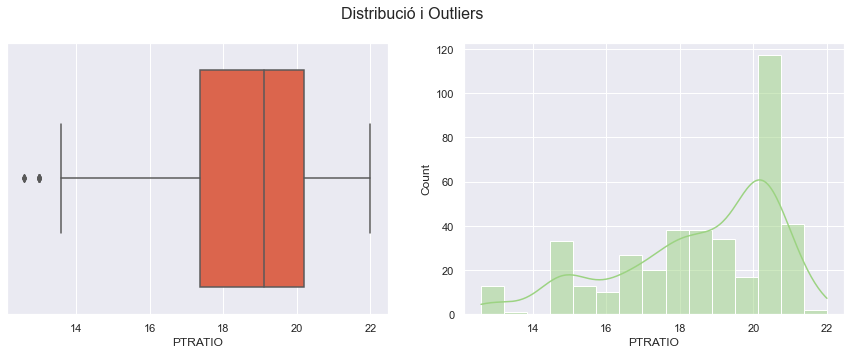

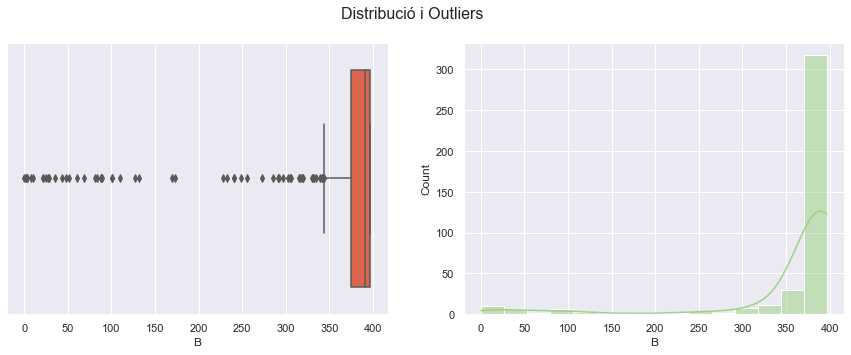

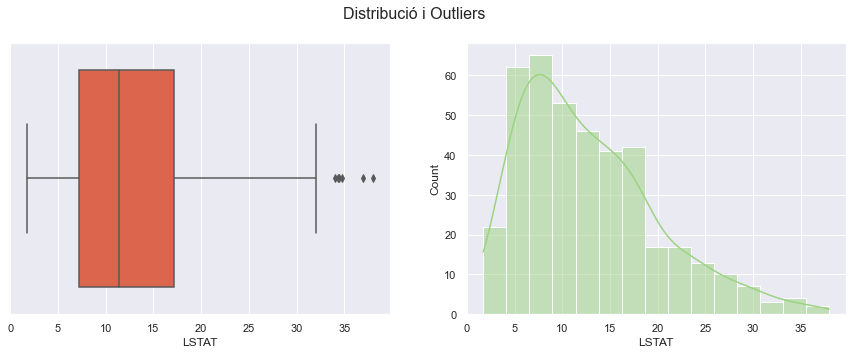

In [55]:
import warnings
warnings.filterwarnings("ignore")

for column in X_train:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Distribució i Outliers', fontsize=16)
        sns.histplot(ax=axes[1], data=X_train, x=X_train[column], bins=15, color='#9CD382', kde= True)
        sns.boxplot(ax=axes[0], x =X_train[column], color='#F35535' )
        
plt.show()

**Ara farem el mateix que amb el model Train però amb el Model Test. Començarem per comprovar el tipus de distribució de les dades és normal o no:**
    
    1. Hipòtesi nul·la      (H0): Aquesta variable té probablement una distribució normal de tipus Gaussiana.
    2. Hipòtesi alternativa (H1): Aquesta variable no té probablement una distribució normal de tipus Gaussiana.

**Coses Importants a dir**:

    1. Cap variable del model Train té distribució normal i per tant aqui l'estandarització no és l'opció. Per un altre costat amb la variable 'CHAS' (dummi) no intervindrem. Cas similar amb la variable la variable categórica 'RAD', que ja té com registres números.
    
    2. Per un altre banda hem de decidir que fem amb les variables numériques. Aquí tenim opcions:
    
           A. Amb la nostre variable 'target' ('MEDV') no intervindrem.
    
           B. Amb les variables que hem vist que tenen outliers, doncs farem un **RobustScaler**. Aquestes variables són                 les següents; 'RM', 'ZN', 'CRIM','B','LSTAT', 'PTRATIO' i 'DIS'.
           
           C. Amb les variables que hem vist sense outliers, doncs farem un **MinMaxScaler**. Aquestes variables són les                 les següents; 'AGE', 'TAX', 'INDUS' i 'NOX'.
    

In [54]:
from scipy import stats
from scipy.stats import shapiro

for data in X_test.columns:
    shapiro_test = stats.shapiro(X_test[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La mostra té probablement una distribució normal i, per tant s'acull l'hipòtesi nul·la.\n")
    else:
        print("La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.\n")

La variable CRIM te un P-value de 7.825072243072412e-19
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable ZN te un P-value de 1.493849434513431e-15
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable INDUS te un P-value de 1.4218643627827987e-05
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable CHAS te un P-value de 2.3233624155660403e-19
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable NOX te un P-value de 7.943868695292622e-05
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable RM te un P-value de 0.010540172457695007
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable AGE te un P-value de 7.946468940644991e-07
La mostra no té probablement una distribuc

*Ara mirarem si en aquest conjunt de dades existeixen outliers*

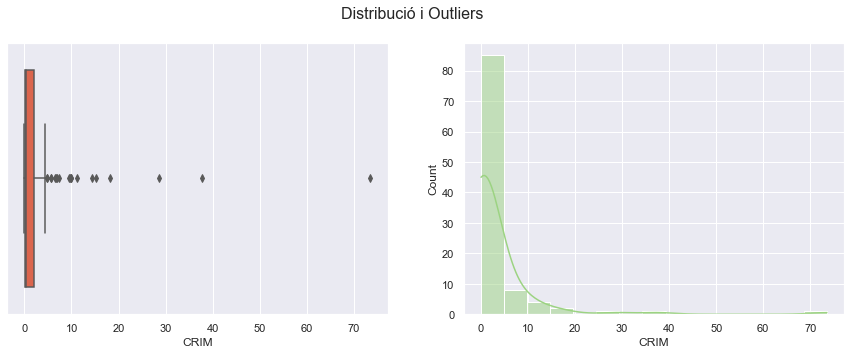

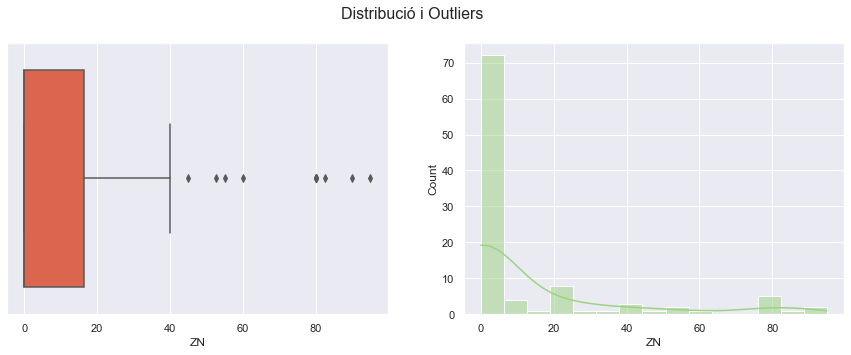

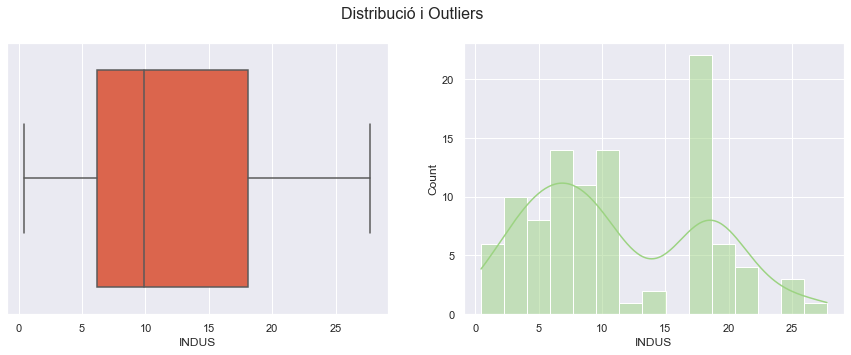

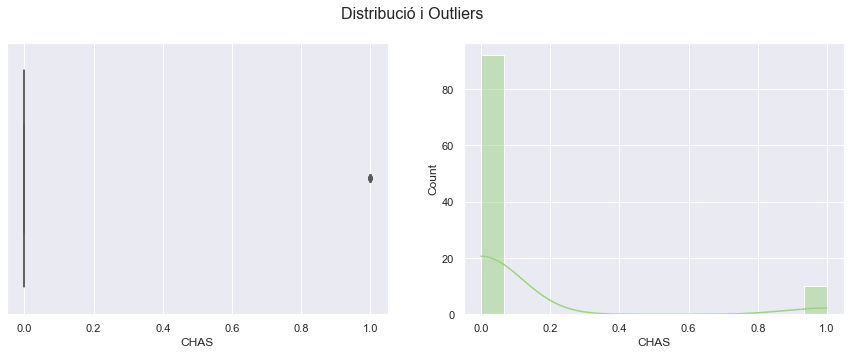

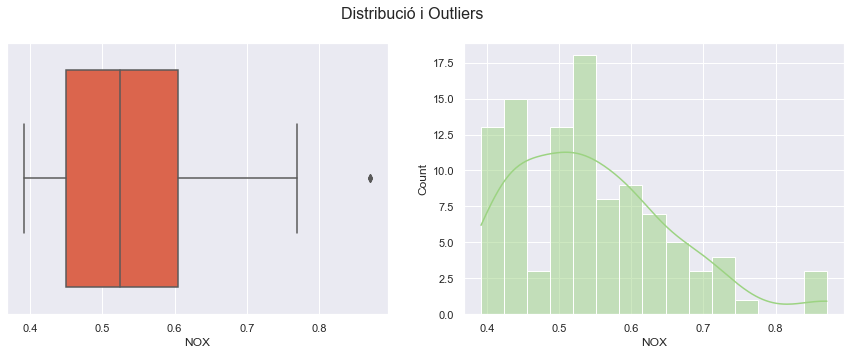

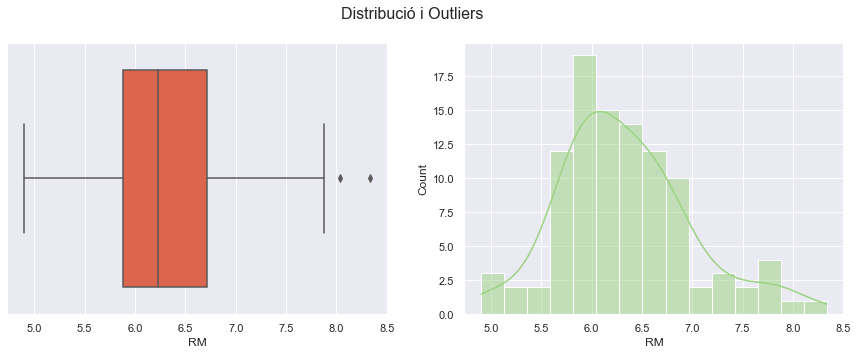

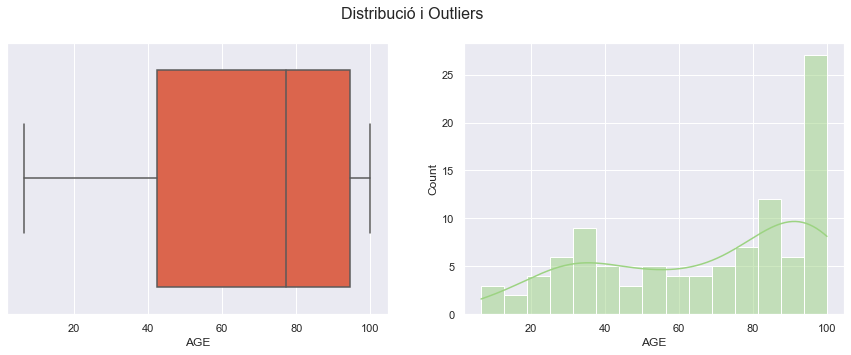

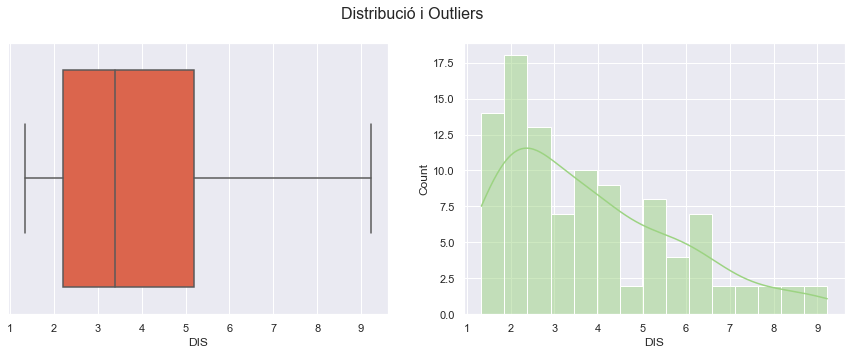

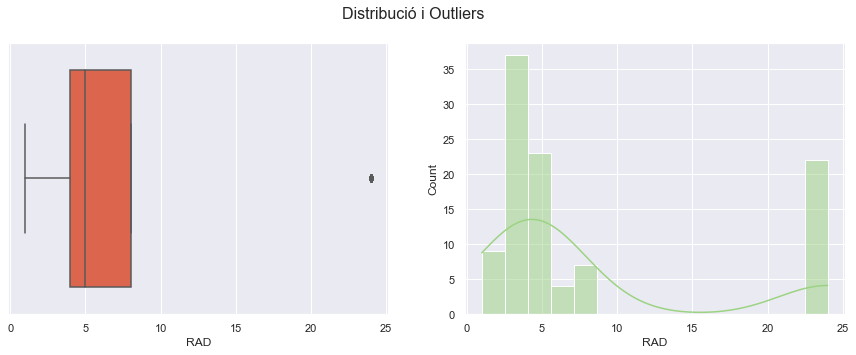

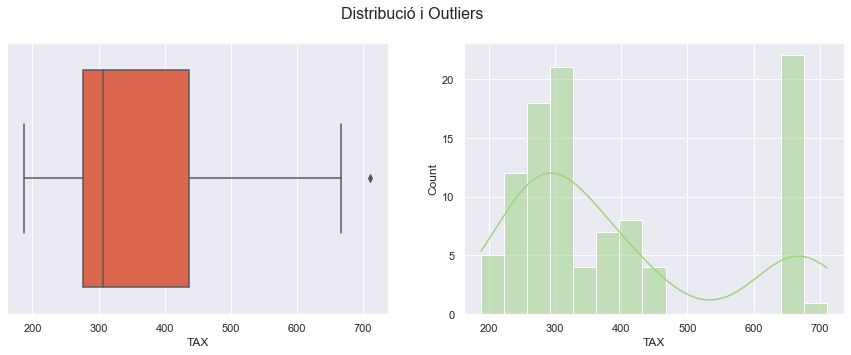

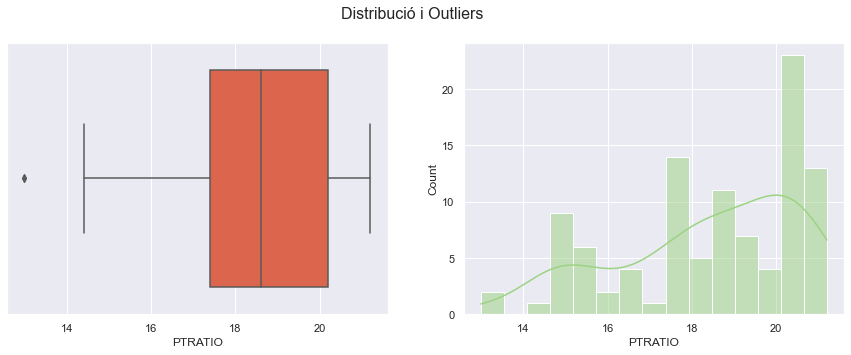

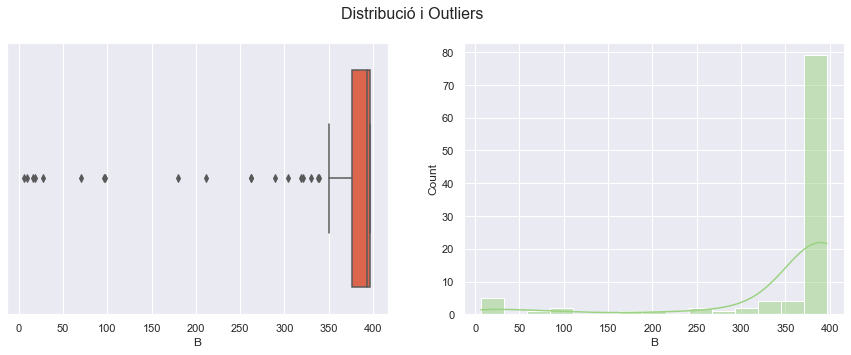

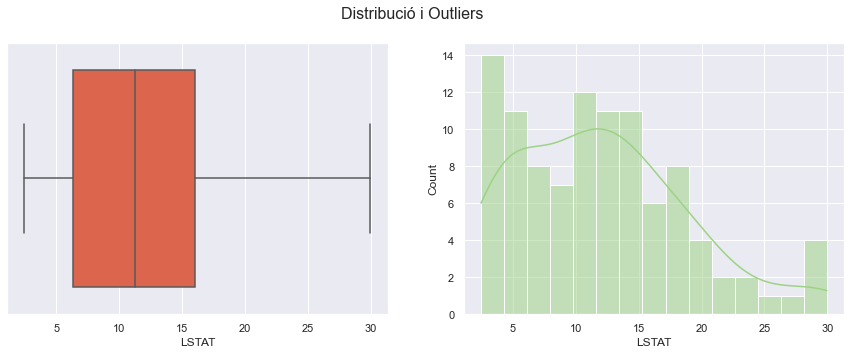

In [56]:
import warnings
warnings.filterwarnings("ignore")

for column in X_test:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Distribució i Outliers', fontsize=16)
        sns.histplot(ax=axes[1], data=X_test, x=X_test[column], bins=15, color='#9CD382', kde= True)
        sns.boxplot(ax=axes[0], x =X_test[column], color='#F35535' )
        
plt.show()

**Coses Importants a dir**:

1. Tant el Train com el test s'assemblen força. Cap grup té cap variable amb distribució Gaussiana, però en general les formes de les distribucions són semblants.

2. Tenim les mateixes variables amb outliers.

3. Finalment amb la variable target farem el mateix, no intervindrem.

### Ara ja tenim tote l'informació que necessitem per fer el preprocessament, doncs procedirem:

*Primer de tot farem una copia (molt important) del dataset d'origen, de manera de poder fer-lo servir en el preprocessament*

In [57]:
house_pre = house.copy()

*Ara farem la transformació del dataframe per les variables amb outliers amb RobustScaler*

In [60]:
from sklearn import preprocessing

amb_out = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
rob_esc = preprocessing.RobustScaler().fit(house_pre[amb_out])
house_pre[amb_out] = rob_esc.transform(house_pre[amb_out])

house_pre.head()

CRIM    ZN  INDUS  CHAS    NOX        RM   AGE       DIS  RAD    TAX  \
0 -0.069593  1.44   2.31     0  0.538  0.496612  65.2  0.285777    1  296.0   
1 -0.063755  0.00   7.07     0  0.469  0.287940  78.9  0.569789    2  242.0   
2 -0.063760  0.00   7.07     0  0.469  1.323171  61.1  0.569789    2  242.0   
3 -0.062347  0.00   2.18     0  0.458  1.069783  45.8  0.924391    3  222.0   
4 -0.052144  0.00   2.18     0  0.458  1.271680  54.2  0.924391    3  222.0   

    PTRATIO         B     LSTAT  MEDV  
0 -1.339286  0.261902 -0.637681  24.0  
1 -0.446429  0.261902 -0.221889  21.6  
2 -0.446429  0.066675 -0.732634  34.7  
3 -0.125000  0.153016 -0.841579  33.4  
4 -0.125000  0.261902 -0.602699  36.2

*Ara farem la transformació del dataframe per les variables sense outliers amb MinMax*

In [62]:
from sklearn import preprocessing

sense_out = ['INDUS', 'NOX', 'AGE', 'TAX']

MinMax = preprocessing.MinMaxScaler().fit(house_pre[sense_out])
house_pre[sense_out] = MinMax.transform(house_pre[sense_out])

house_pre.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

   RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0    1  0.208015 -1.339286  0.261902 -0.637681  24.0  
1    2  0.104962 -0.446429  0.261902 -0.221889  21.6  
2    2  0.104962 -0.446429  0.066675 -0.732634  34.7  
3    3  0.066794 -0.125000  0.153016 -0.841579  33.4  
4    3  0.066794 -0.125000  0.261902 -0.602699  36.2

### **Exercici 3**

Resumeix les noves columnes generades de manera estadística i gràfica.

In [65]:
house.describe().T.round(3)

count     mean      std      min      25%      50%      75%      max
CRIM     506.0    3.614    8.602    0.006    0.082    0.257    3.677   88.976
ZN       506.0   11.364   23.322    0.000    0.000    0.000   12.500  100.000
INDUS    506.0   11.137    6.860    0.460    5.190    9.690   18.100   27.740
CHAS     506.0    0.069    0.254    0.000    0.000    0.000    0.000    1.000
NOX      506.0    0.555    0.116    0.385    0.449    0.538    0.624    0.871
RM       506.0    6.285    0.703    3.561    5.885    6.208    6.624    8.780
AGE      506.0   68.575   28.149    2.900   45.025   77.500   94.075  100.000
DIS      506.0    3.795    2.106    1.130    2.100    3.207    5.188   12.126
RAD      506.0    9.549    8.707    1.000    4.000    5.000   24.000   24.000
TAX      506.0  408.237  168.537  187.000  279.000  330.000  666.000  711.000
PTRATIO  506.0   18.456    2.165   12.600   17.400   19.050   20.200   22.000
B        506.0  356.674   91.295    0.320  375.378  391.440  396.225  396.900
LSTAT    506.0   12.653    7.141    1.730    6.950   11.360   16.955   37.970
MEDV     506.0   22.533    9.197    5.000   17.025   21.200   25.000   50.000

In [66]:
house_pre.describe().T.round(3)

count    mean    std     min     25%     50%     75%     max
CRIM     506.0   0.934  2.393  -0.070  -0.049  -0.000   0.951  24.678
ZN       506.0   0.909  1.866   0.000   0.000   0.000   1.000   8.000
INDUS    506.0   0.391  0.251   0.000   0.173   0.338   0.647   1.000
CHAS     506.0   0.069  0.254   0.000   0.000   0.000   0.000   1.000
NOX      506.0   0.349  0.238   0.000   0.132   0.315   0.492   1.000
RM       506.0   0.103  0.952  -3.587  -0.438   0.000   0.562   3.484
AGE      506.0   0.676  0.290   0.000   0.434   0.768   0.939   1.000
DIS      506.0   0.190  0.682  -0.673  -0.359   0.000   0.641   2.888
RAD      506.0   9.549  8.707   1.000   4.000   5.000  24.000  24.000
TAX      506.0   0.422  0.322   0.000   0.176   0.273   0.914   1.000
PTRATIO  506.0  -0.212  0.773  -2.304  -0.589   0.000   0.411   1.054
B        506.0  -1.668  4.379 -18.761  -0.770   0.000   0.230   0.262
LSTAT    506.0   0.129  0.714  -0.963  -0.441   0.000   0.559   2.660
MEDV     506.0  22.533  9.197   5.000  17.025  21.200  25.000  50.000

*Podem veure clarament que les columnes estan estandaritzades i també podem fer la comparativa sense problemes. Però ara farem la visualització gràfica per corroborar les dades.*

Compararem els datsets original i preprocessat amb un bucle.

In [74]:
def comparacio(data1, data2):
    for column in house:
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('Comparativa DF original i Preprocessat', fontsize=17)
        sns.histplot(ax=axes[0], data=data1, x=data1[column], bins=15, color='#9CD382', kde= True)
        sns.histplot(ax=axes[1], data=data2, x=data2[column], bins=15, color='#F35535', kde= True)


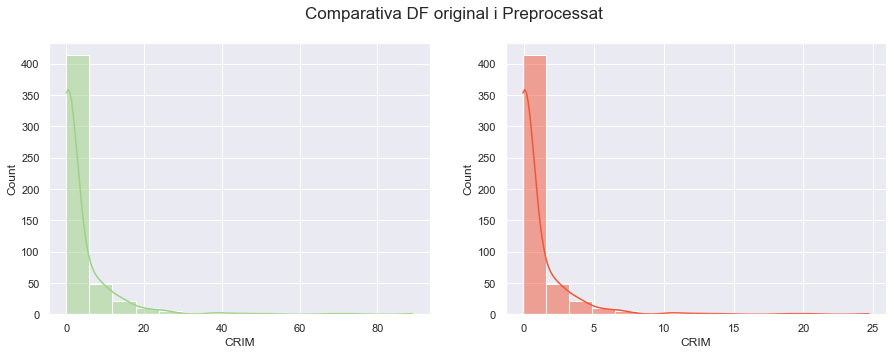

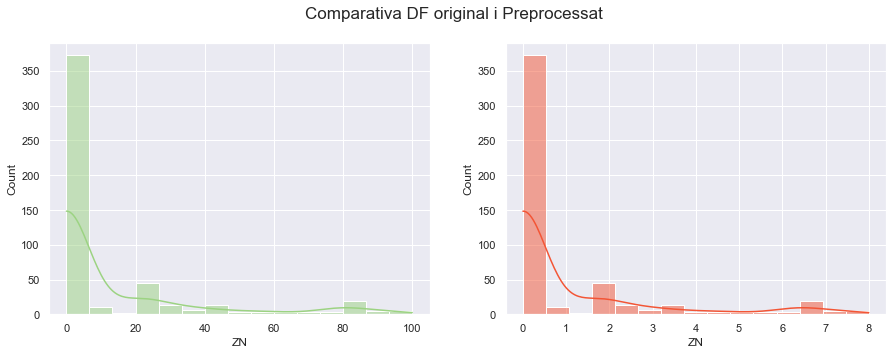

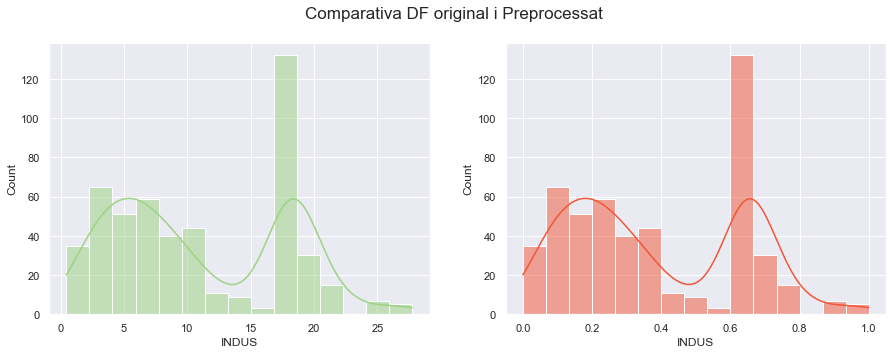

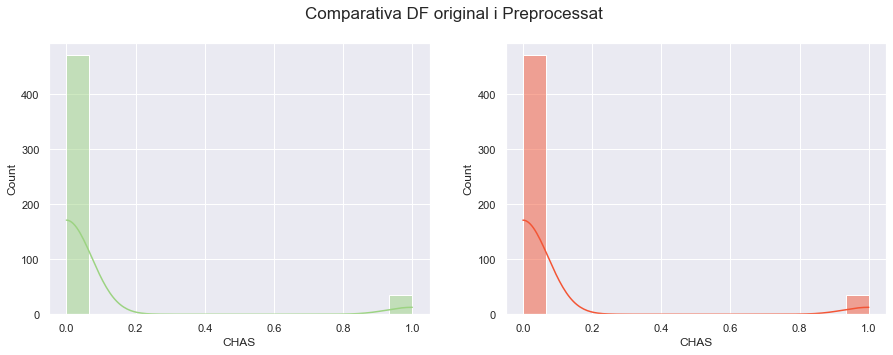

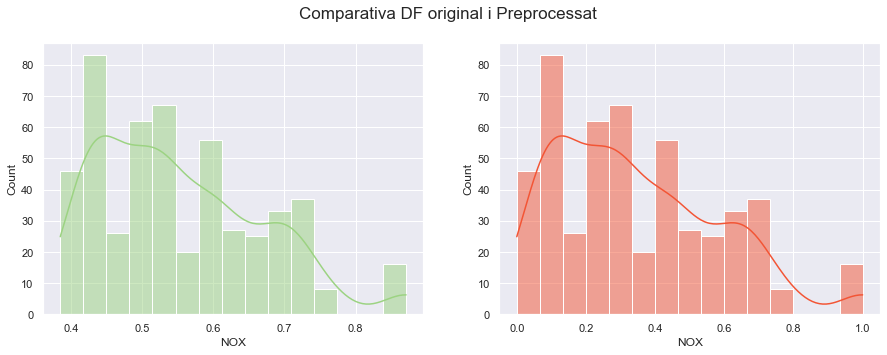

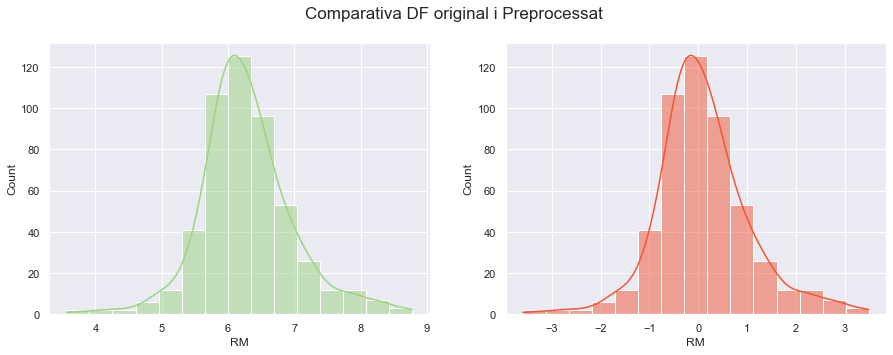

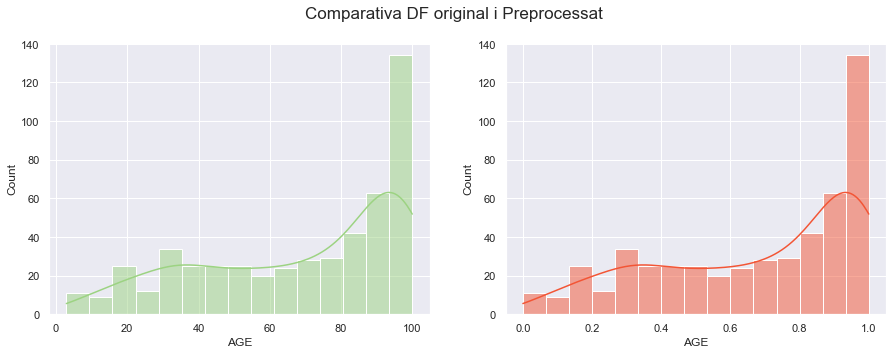

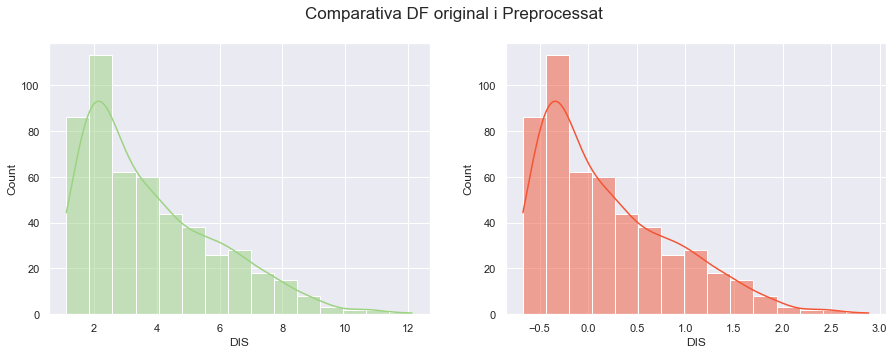

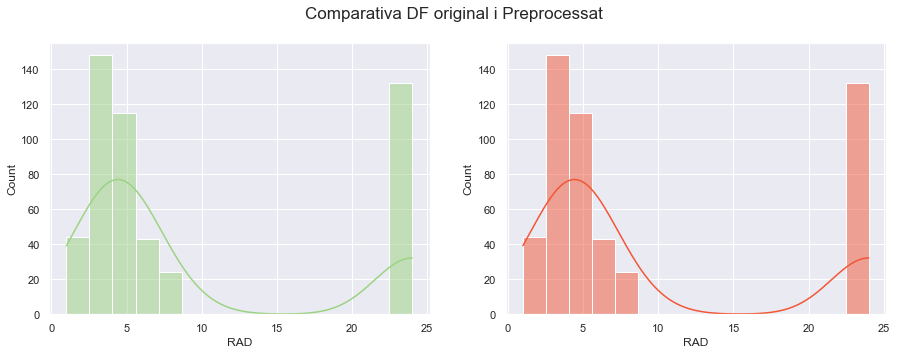

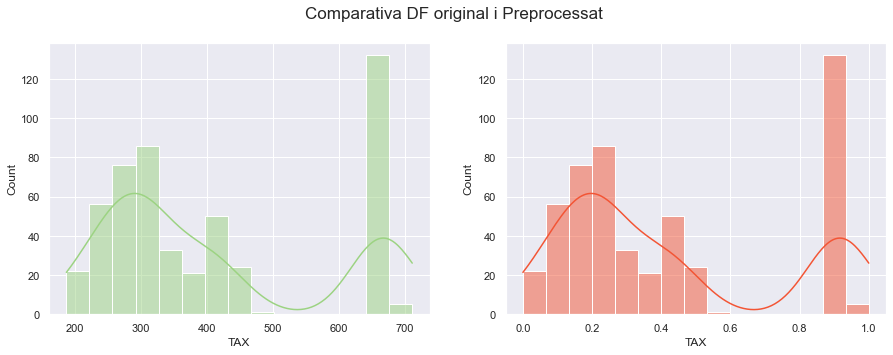

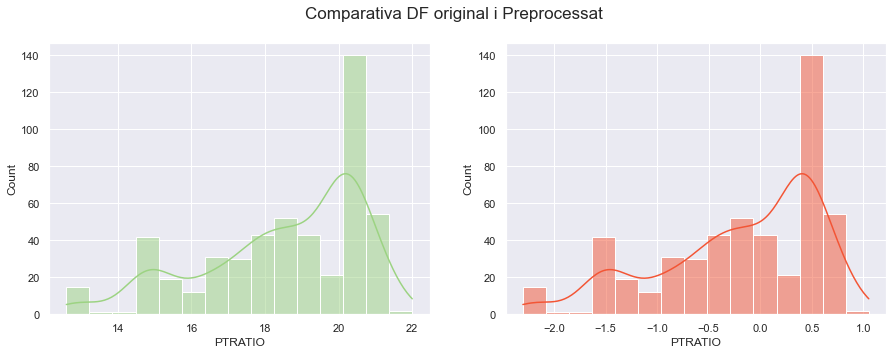

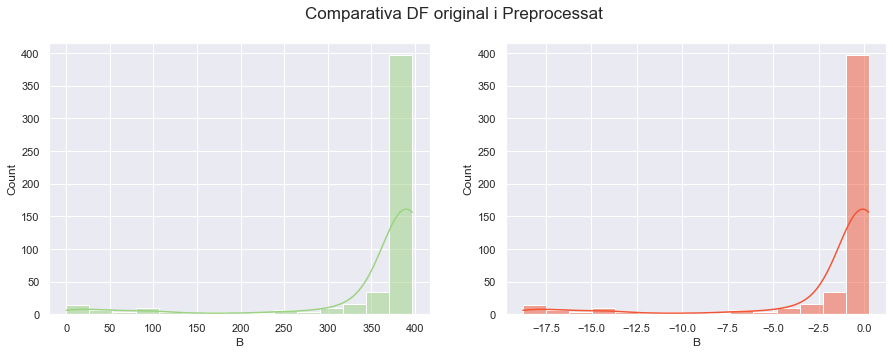

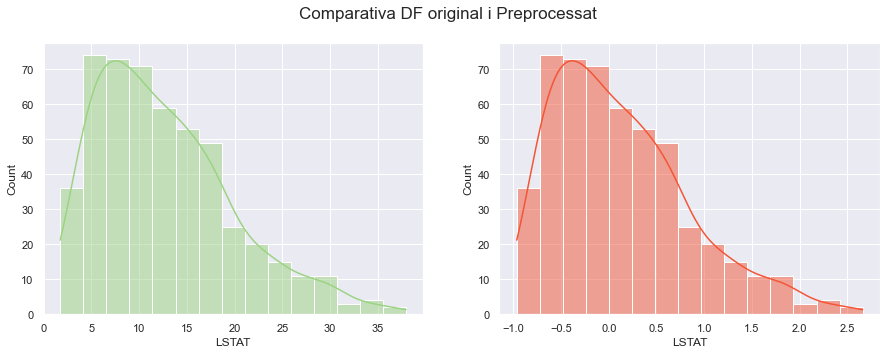

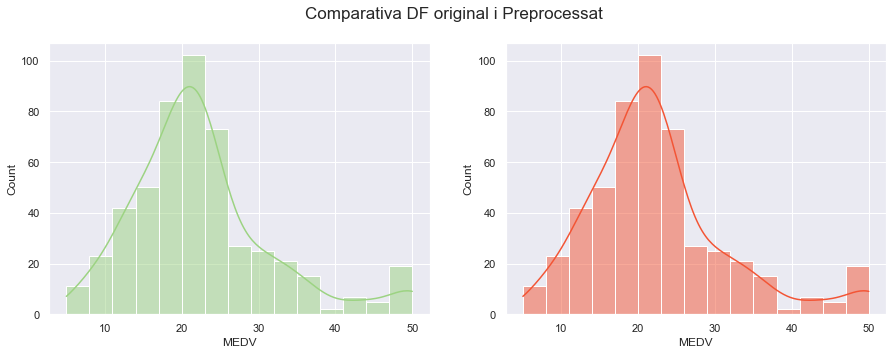

In [75]:
comparacio(house, house_pre)

Una cosa molt interessant de afegir és que les variables amb outliers han redistribuït les dades tenin en compte els mateixos outliers. Per un altre costat observem com de forma general ara existeix una escala de dades de 0 a 1 i entre -1 i 1. Les noves escales han suavitzat les curves en moltes variables i fan distribucions més intuitives.